<a href="https://colab.research.google.com/github/Codewithkaint/LearnGit/blob/main/Update_cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [10]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:11<00:00, 186MB/s]
100% 1.06G/1.06G [00:11<00:00, 101MB/s]


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [13]:
convBase=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [14]:
convBase.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [15]:
model=Sequential()
model.add(convBase)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
 convBase.trainable=False

In [21]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [26]:
batchSize=32
trainDs=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
testDs=ImageDataGenerator(rescale=1./255)

trainGen=trainDs.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=batchSize,
    class_mode='binary'
)

validationGen=testDs.flow_from_directory(
    '/content/test',
    target_size=(150,150),
    batch_size=batchSize,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
history=model.fit_generator(trainGen,epochs=10,validation_data=validationGen)

<ipython-input-29-98d42926cb64>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(trainGen,epochs=10,validation_data=validationGen)


Epoch 1/10
625/625 [==============================] - 180s 288ms/step - loss: 0.2990 - accuracy: 0.8711 - val_loss: 0.2284 - val_accuracy: 0.9032
Epoch 2/10
625/625 [==============================] - 177s 283ms/step - loss: 0.2409 - accuracy: 0.8964 - val_loss: 0.2297 - val_accuracy: 0.8996
Epoch 3/10
625/625 [==============================] - 179s 286ms/step - loss: 0.2210 - accuracy: 0.9074 - val_loss: 0.1984 - val_accuracy: 0.9160
Epoch 4/10
625/625 [==============================] - 179s 286ms/step - loss: 0.2121 - accuracy: 0.9104 - val_loss: 0.2020 - val_accuracy: 0.9118
Epoch 5/10
625/625 [==============================] - 180s 287ms/step - loss: 0.1973 - accuracy: 0.9158 - val_loss: 0.1874 - val_accuracy: 0.9180
Epoch 6/10
625/625 [==============================] - 179s 286ms/step - loss: 0.1884 - accuracy: 0.9180 - val_loss: 0.2178 - val_accuracy: 0.9100
Epoch 7/10
625/625 [==============================] - 179s 286ms/step - loss: 0.1792 - accuracy: 0.9244 - val_loss: 0.2007 -

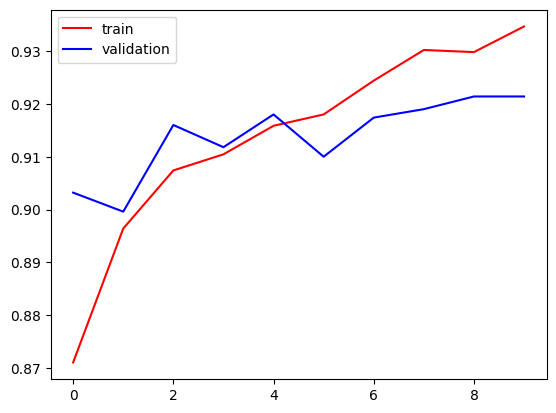

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

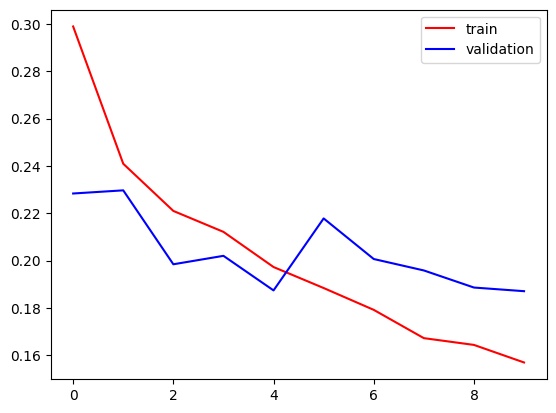

In [31]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()